In [3]:
#предварительная обработка данных

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#обработка отсутствующих значений
data = pd.read_csv('../dataset/WineDataset.csv')
missing_values = data.isnull().sum()
data_cleaned = data.dropna()
data_filled = data.fillna(data.mean())

#кодируем категориальную переменную(по одному признаку)
one_hot_df = pd.get_dummies(data_filled, columns=['Wine'], prefix='wine')

#проводим стандартизацию данных
scaler = StandardScaler()
stand_data = pd.DataFrame(scaler.fit_transform(one_hot_df), columns=one_hot_df.columns)

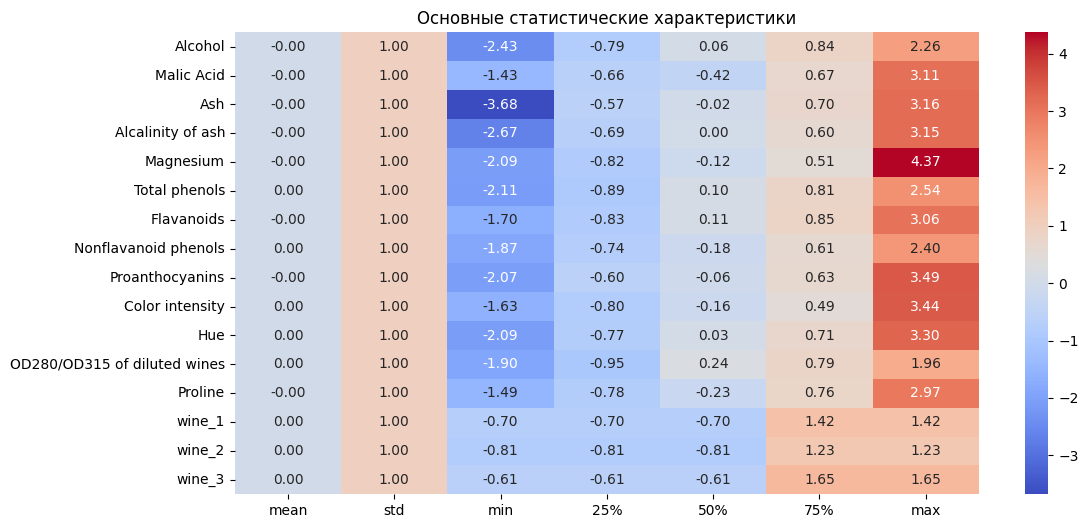

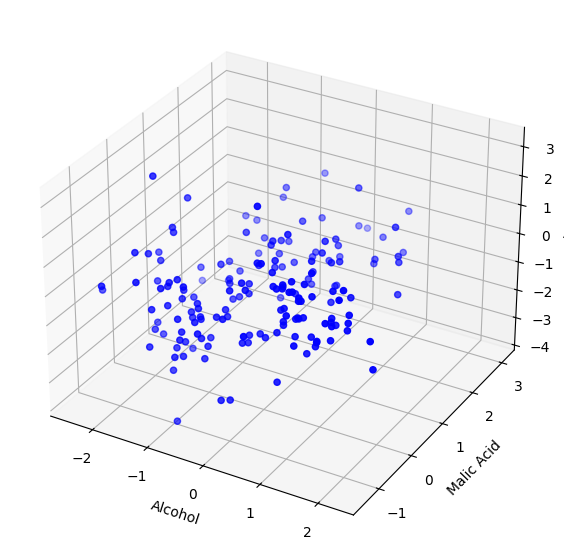

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

statistics = stand_data.describe()
plt.figure(figsize=(12, 6))
sns.heatmap(statistics.iloc[1:, :].T, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Основные статистические характеристики')

#3D-визуализация
x = stand_data['Alcohol']
y = stand_data['Malic Acid']
z = stand_data['Ash']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Ash')
plt.show()